In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression

# ****Include DataSet****

In [2]:
df = pd.read_csv("./vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Delete Unnecessary Variables For Data Science

We will not use "Rank", "Name", "Year", "Publisher" variables in this data set. So we will delete these variables from the data set using the "drop" function.

In this function, the "axis" parameter determines whether it will be a row or a column. If we set "axis = 1", the column will be deleted.

The "inplace" parameter is marked as "False" in the default setting. If we change this to "True", changes will be automatically saved in the data set.


If we do not use the "inplace" parameter, we will have to do it """df = df.drop (["Rank", "Name", "Year", "Publisher"], axis = 1)"""

In [6]:
df.drop(["Rank","Name","Year","Publisher"],axis=1,inplace=True)
df.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


# Converting Categorical Variables To Numeric variables


Categorical variables are transformed with the "get_dummies" function in pandas.

In [7]:
dums = pd.get_dummies(df[["Platform","Genre"]])
dums.head()

,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


After the categorical variables are converted, any transformed new variable belonging to each variable is selected and deleted.

Because the value of the deleted variable can be understood by looking at the other transformed variables already remaining.


For example, if all non-deleted variables are 0, it means that the deleted variable must be 1.

In [8]:
dums.drop(["Platform_2600","Genre_Misc"],axis=1,inplace=True)


Then, a new data set is created by combining the data set with the newly created variables. The old categorical variables that have been transformed are removed from the data set because they are no longer needed.

In [9]:
final_df= pd.concat([df,dums],axis=1)
final_df.drop(["Platform","Genre"],axis=1,inplace=True)
final_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Adventure,Genre_Fighting,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,29.08,3.58,6.81,0.77,40.24,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11.27,8.89,10.22,1.00,31.37,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0



This data set is now ready to be used. Let's start.

# Simple Linear Regression

### Outlier Control

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(final_df.Global_Sales,final_df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9})
plt.xlim(-2,85)
plt.ylim(bottom=0)

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

As you can see, there is 1 extreme outlier in the variable "EU_Sales", so let's eliminate this value.

In [ ]:
final_df.EU_Sales[df.EU_Sales>15]
#this value is in index 0.

0    29.02
Name: EU_Sales, dtype: float64

In [ ]:
df_outlier = final_df.drop([0],axis=0) 

(0.0, 13.524113383535223)

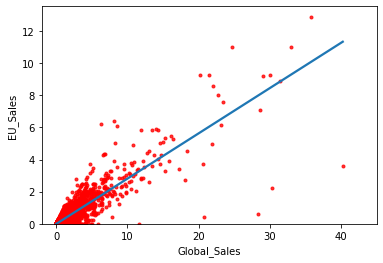

In [ ]:
import matplotlib.pyplot as plt
g = sns.regplot(df_outlier.Global_Sales,df_outlier.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,45)
plt.ylim(bottom=0)

Let's choose dependent and independent variables.

In [ ]:
x = df_outlier[["EU_Sales"]]
y = df_outlier["Global_Sales"]


To process the data, let's create the model and fit this model with X and Y variables.

In [ ]:
reg = LinearRegression()
model = reg.fit(x,y)


Let's look at the score of the model we created.

In [ ]:
model.score(x,y)

0.7778253603068711


After creating the model, let's make it guess by giving certain values. (It predicts the "Global_Sales" variable according to the "EU_Sales" variable.)

In [ ]:
model.predict([[15]])

array([41.55144923])

In [ ]:
est = [[12],[30],[50]]
model.predict(est)

array([ 33.26762842,  82.97055326, 138.1960253 ])

# Multiple Linear Regression


In multiple linear regression, this difference is selected as dependent on one variable and all remaining variables are selected as independent variables.

In [ ]:
x=final_df.drop("Global_Sales",axis =1)
y = final_df.Global_Sales

Now we need to divide our data set into "test" and "train". Because after training our program from the "train" set, we will test it with our "test" set to see the error value.

For this we will use the **"train_test_split"** function in the **"scikit-learn"** module.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 13)
#test_size = "selects what percentage of the data set will get as "test""

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#Let's look at the shape information

(13278, 45)
(13278,)
(3320, 45)
(3320,)


In [ ]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
#Let's create our model and train "x_train" and "y_train" sets.


After training our model, let's look at the total error squares (margin of error) with the "mean_squared_error" method in the scikit-learn module.


The model is provided to generate estimates by using the "x_test" set. It is then checked how close this generated prediction is to the "y_test" set.

The number becomes readable by inserting it into the squaring function in the numpy module.

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.0051153111219672705